In [1]:
from collections import OrderedDict
from datetime import date
from dateutil.relativedelta import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Mortgage Amortization

In this scenario we are going to buy a £600,000 property. We are going to assume we have 45% of the properties value in equity and cash (£270,000) and that we require a mortgage of £330,000 (55%) to cover the remainder.

We'll simulate the scenario using a fixed-rate interest rate of 3.92%. 

This is a simple scenario to illustrate what happens when you make additional payments.

In [2]:
def amortize(principal=330000., interest_rate=0.0392, years=25, equity=270000., additional_principal=0., 
             start_date=date.today()):
    """Yields an Ordered Dict for N periods to amortize a mortgage given key variables."""
    payment = -(np.pmt(rate=interest_rate / 12, nper=years * 12, pv=principal))
    n_period = 1
    beginning_balance = principal
    ending_balance = principal
    
    while ending_balance > 0:
        interest = ((interest_rate / 12) * beginning_balance)
        payment = min(payment, beginning_balance + interest)
        principal = payment - interest
        additional_principal = min(additional_principal, beginning_balance - principal)
        ending_balance = beginning_balance - (principal + additional_principal)
        
        yield OrderedDict([('Month', start_date), ('Period', n_period), ('Year', start_date.year), 
                           ('Beginning Balance', beginning_balance), ('Payment', payment), ('Principal', principal),
                           ('Interest', interest), ('Additional Principal', additional_principal), 
                           ('End Balance', ending_balance), ('Equity', equity)])

        n_period += 1
        start_date += relativedelta(months=1)
        equity += principal
        beginning_balance = ending_balance

----

Let's visualise the loan we describe above and see what the interest/principal payments looks like:

Last month: 2044-08-24. Interest: £188195.33867601102


(0, 1807.7782763299335)

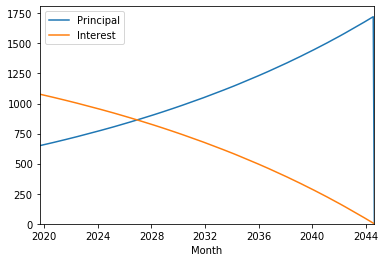

In [3]:
df = pd.DataFrame(amortize())

final_month = df['Month'].tail(1).values[0]
total_interest = df['Interest'].sum()
print(f'Last month: {final_month}. Interest: £{total_interest}')

df[['Month', 'Principal', 'Interest']].groupby('Month').sum().plot().set_ylim(ymin=0)

Now, lets see what happens if we pay £500 on top of the mortgage repayment:

Last month: 2036-06-24. Interest: £121857.0131029972


(0, 2324.146306414605)

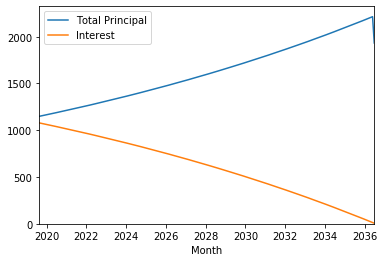

In [4]:
df = pd.DataFrame(amortize(additional_principal=500.))
df['Total Principal'] = df['Additional Principal'] + df['Principal']

final_month = df['Month'].tail(1).values[0]
total_interest = df['Interest'].sum()

print(f'Last month: {final_month}. Interest: £{total_interest}')

df[['Month', 'Total Principal', 'Interest']].groupby('Month').sum().plot().set_ylim(ymin=0)

----

# Conclusion

As you can see, we manage to reduce our time horizon, by 8 years, from July 2044, to July 2036. Consequently, <u>we managed to save ~£59,000 in interest repayments</u>.